<a href="https://colab.research.google.com/github/amirabbasgashtil/data-mining-course/blob/main/notebooks/Han_chapter6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Han - classification, basic concepts and methods - chapter 6

## decision tree induction
Decision tree induction is the learning of decision trees from class-labeled training tuples. A decision
tree is a flowchart-like tree structure.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text

wine = datasets.load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

accuracy = classifier.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

tree_rules = export_text(classifier, feature_names=wine.feature_names)
print("Decision Tree Rules:\n", tree_rules)

Accuracy: 0.94
Decision Tree Rules:
 |--- color_intensity <= 3.82
|   |--- proline <= 1002.50
|   |   |--- ash <= 3.07
|   |   |   |--- class: 1
|   |   |--- ash >  3.07
|   |   |   |--- class: 0
|   |--- proline >  1002.50
|   |   |--- class: 0
|--- color_intensity >  3.82
|   |--- flavanoids <= 1.40
|   |   |--- class: 2
|   |--- flavanoids >  1.40
|   |   |--- proline <= 724.50
|   |   |   |--- malic_acid <= 3.92
|   |   |   |   |--- class: 1
|   |   |   |--- malic_acid >  3.92
|   |   |   |   |--- class: 0
|   |   |--- proline >  724.50
|   |   |   |--- class: 0



## Attribute selection measures
An attribute selection measure is a heuristic for selecting the splitting criterion that “best” separates
a given data partition, D, of class-labeled training tuples into individual classes.

**Information Gain** Measures how much "information" or "uncertainty" is reduced by choosing a particular attribute.

**Gain Ratio** A refinement of information gain that avoids a bias toward attributes with many distinct values

**Gini Index** Measures the “impurity” of a dataset; it quantifies how mixed the classes are within the subsets after a split.

**Chi-Square** A statistical measure to test the independence of an attribute with respect to the target variable.

In [2]:

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Load the wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use Information Gain for feature selection
selector = SelectKBest(mutual_info_classif, k=2)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the selected training data
clf.fit(X_train_selected, y_train)

# Make predictions on the selected test data
predictions = clf.predict(X_test_selected)

# Display the accuracy of the model
accuracy = clf.score(X_test_selected, y_test)
print(f"Accuracy: {accuracy:.2f}")

# Display the decision tree rules for the selected features
selected_feature_names = [wine.feature_names[i] for i in selector.get_support(indices=True)]
tree_rules = export_text(clf, feature_names=selected_feature_names)
print("Decision Tree Rules for Selected Features:\n", tree_rules)


Accuracy: 0.89
Decision Tree Rules for Selected Features:
 |--- color_intensity <= 3.82
|   |--- color_intensity <= 3.49
|   |   |--- class: 1
|   |--- color_intensity >  3.49
|   |   |--- flavanoids <= 2.34
|   |   |   |--- class: 1
|   |   |--- flavanoids >  2.34
|   |   |   |--- class: 0
|--- color_intensity >  3.82
|   |--- flavanoids <= 1.40
|   |   |--- class: 2
|   |--- flavanoids >  1.40
|   |   |--- flavanoids <= 2.11
|   |   |   |--- class: 1
|   |   |--- flavanoids >  2.11
|   |   |   |--- flavanoids <= 3.75
|   |   |   |   |--- color_intensity <= 3.95
|   |   |   |   |   |--- color_intensity <= 3.87
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- color_intensity >  3.87
|   |   |   |   |   |   |--- flavanoids <= 2.45
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- flavanoids >  2.45
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- color_intensity >  3.95
|   |   |   |   |   |--- color_intensity <= 4.47
|   |   |   |   |   

## tree pruning


In [3]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import GridSearchCV

# Load the Iris dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Define the hyperparameter grid for cost-complexity pruning
param_grid = {'ccp_alpha': [0.001, 0.002, 0.003, 0.004, 0.005]}

# Use GridSearchCV to find the best hyperparameter
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best decision tree classifier
best_clf = grid_search.best_estimator_

# Make predictions on the test data
predictions = best_clf.predict(X_test)

# Display the accuracy of the pruned tree
accuracy = best_clf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

# Display the decision tree rules for the pruned tree
tree_rules = export_text(best_clf, feature_names=wine.feature_names)
print("Decision Tree Rules for Pruned Tree:\n", tree_rules)

Accuracy: 0.94
Decision Tree Rules for Pruned Tree:
 |--- color_intensity <= 3.82
|   |--- proline <= 1002.50
|   |   |--- ash <= 3.07
|   |   |   |--- class: 1
|   |   |--- ash >  3.07
|   |   |   |--- class: 0
|   |--- proline >  1002.50
|   |   |--- class: 0
|--- color_intensity >  3.82
|   |--- flavanoids <= 1.40
|   |   |--- class: 2
|   |--- flavanoids >  1.40
|   |   |--- proline <= 724.50
|   |   |   |--- malic_acid <= 3.92
|   |   |   |   |--- class: 1
|   |   |   |--- malic_acid >  3.92
|   |   |   |   |--- class: 0
|   |   |--- proline >  724.50
|   |   |   |--- class: 0



## bayes theorem

In [4]:
!pip install ucimlrepo

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from ucimlrepo import fetch_ucirepo

# load spambase dataset
spambase = fetch_ucirepo(id=94)

X = spambase.data.features
y = spambase.data.targets

print(spambase.metadata)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier (MultinomialNB for discrete features)
clf = MultinomialNB()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
predictions = clf.predict(X_test)

# Display the accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f" \nAccuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))

{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Naïve Bayesian classification

In [8]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.2, random_state=42)

# Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Create a Naïve Bayes classifier (MultinomialNB for discrete features)
clf = MultinomialNB()

# Train the classifier on the TF-IDF transformed training data
clf.fit(X_train_tfidf, y_train)

# Make predictions on the TF-IDF transformed test data
predictions = clf.predict(X_test_tfidf)

# Display the accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions, target_names=newsgroups.target_names))


Accuracy: 0.66
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.86      0.12      0.21       151
           comp.graphics       0.70      0.61      0.66       202
 comp.os.ms-windows.misc       0.67      0.61      0.64       195
comp.sys.ibm.pc.hardware       0.52      0.78      0.62       183
   comp.sys.mac.hardware       0.89      0.64      0.74       205
          comp.windows.x       0.89      0.81      0.85       215
            misc.forsale       0.86      0.60      0.71       193
               rec.autos       0.85      0.73      0.79       196
         rec.motorcycles       0.51      0.74      0.61       168
      rec.sport.baseball       0.96      0.77      0.86       211
        rec.sport.hockey       0.88      0.88      0.88       198
               sci.crypt       0.63      0.83      0.71       201
         sci.electronics       0.85      0.55      0.67       202
                 sci.med       0.88 

## k-nearest-neighbor classifiers

In [13]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a k-NN classifier with k=3
clf = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
predictions = clf.predict(X_test)

# Display the accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions, target_names=wine.target_names))


Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

     class_0       0.86      0.86      0.86        14
     class_1       0.92      0.79      0.85        14
     class_2       0.60      0.75      0.67         8

    accuracy                           0.81        36
   macro avg       0.79      0.80      0.79        36
weighted avg       0.82      0.81      0.81        36



## Case-based reasoning

In [18]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from google.colab import files

# Load the MovieLens dataset
uploaded = files.upload()
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
print(movies.head())
print(ratings.head())

# Merge movies and ratings data
movie_ratings = pd.merge(ratings, movies, on='movieId')
print(movie_ratings.head())
# Create a user-item matrix for collaborative filtering
user_item_matrix = movie_ratings.pivot_table(index='userId', columns='title', values='rating', fill_value=0)

# Use TF-IDF to convert movie titles into numerical features
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movies['title'])

# Calculate cosine similarity between movie titles
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get movie recommendations using CBR
def get_movie_recommendations(movie_title):
    movie_indices = movies.index[movies['title'] == movie_title].tolist()
    if not movie_indices:
        print(f"Movie '{movie_title}' not found in the dataset.")
        return []
    movie_index = movie_indices[0]
    cosine_scores = list(enumerate(cosine_sim[movie_index]))
    cosine_scores = sorted(cosine_scores, key=lambda x: x[1], reverse=True)
    top_similar_movies = cosine_scores[1:6]  # Exclude the input movie itself

    recommended_movies = []
    for index, score in top_similar_movies:
        recommended_movies.append(movies['title'].iloc[index])

    return recommended_movies

# Example usage
input_movie = "Toy Story (1995)"
recommendations = get_movie_recommendations(input_movie)

# Display the recommendations
print(f"\n\nMovies similar to '{input_movie}':")
for movie in recommendations:
    print("-", movie)

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247

## Linear Regression

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
Coefficients: [[0.41933849]]
Mean Squared Error: 0.7091157771765549
R-squared: 0.45885918903846656


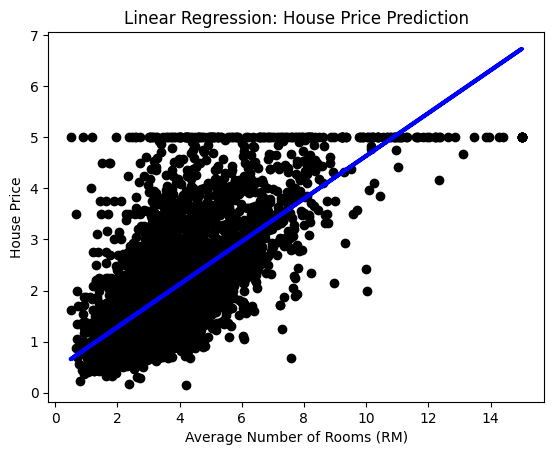

In [24]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.DataFrame(housing.target, columns=['target'])
print(X.head())

# median income in block group feature => MedInc
X_feature = X[['MedInc']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the model coefficients and performance metrics
print("Coefficients:", model.coef_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the regression line
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('House Price')
plt.title('Linear Regression: House Price Prediction')
plt.show()

## Perceptron: turning linear regression to classification

Accuracy: 0.61
Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76        22
           1       0.00      0.00      0.00        14

    accuracy                           0.61        36
   macro avg       0.31      0.50      0.38        36
weighted avg       0.37      0.61      0.46        36



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


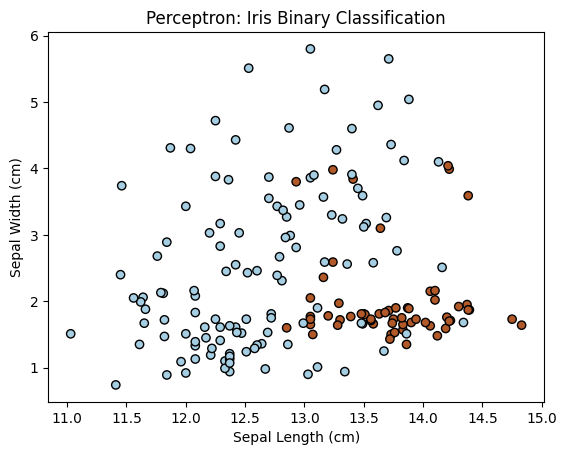

In [25]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Consider only the first two features for simplicity and binary classification
X = X[:, :2]

# Map wine classes to binary classes (setosa vs. non-setosa)
y_binary = (y == 0).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Create a perceptron classifier
perceptron = Perceptron()

# Train the perceptron on the training data
perceptron.fit(X_train, y_train)

# Make predictions on the test data
predictions = perceptron.predict(X_test)

# Display the accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))

# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y_binary, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Perceptron: Iris Binary Classification')
plt.show()

## Logistic regression

Saving titanic.csv to titanic.csv
Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83        80
           1       0.85      0.65      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


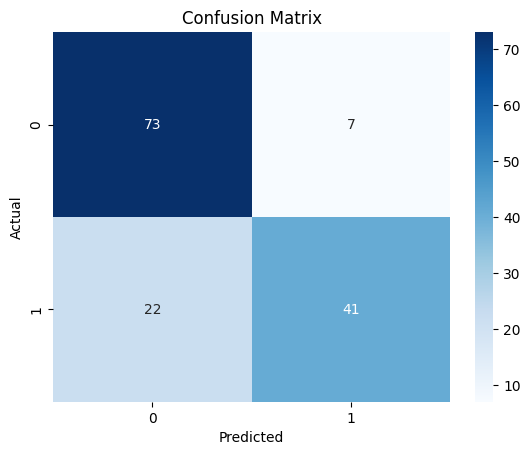

In [26]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Load the Titanic dataset
uploaded = files.upload()
titanic = pd.read_csv('titanic.csv')

# Drop rows with missing values and select relevant features
titanic = titanic.dropna(subset=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived'])
X = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = titanic['Survived']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
predictions = logreg.predict(X_test)

# Display the accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))

# Plot the confusion matrix
cm = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## Introducing ensemble methods

In [27]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = rf_classifier.predict(X_test)

# Display the accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## Bagging

In [29]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Breast Cancer Wisconsin dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier with 80 trees
rf_classifier = RandomForestClassifier(n_estimators=80, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = rf_classifier.predict(X_test)

# Display the accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## Boosting

In [31]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost classifier with 50 weak learners (Decision Trees)
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the classifier on the training data
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = adaboost_classifier.predict(X_test)

# Display the accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.82      1.00      0.90        14
           2       1.00      0.88      0.93         8

    accuracy                           0.92        36
   macro avg       0.94      0.91      0.92        36
weighted avg       0.93      0.92      0.92        36



## Random forests

In [32]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Breast Cancer Wisconsin dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier with 100 trees
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = random_forest_classifier.predict(X_test)

# Display the accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

